In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings(action='ignore')
import os 
import re
from datetime import datetime 
import datetime as dt
import itertools

In [2]:
df = pd.read_excel('calving_data_after_28_days.xlsx')

In [3]:
df.head()

,date,calv_date,cow_id,lact_no,activity,rest_time,rest_per_bout,restlessness_ratio,manner_of_calving,offspring,parity,days_after_calving
0,2021-12-24,2021-12-24,3,2,204,--,--,--,Normal,1,multiparous,0
1,2021-12-25,2021-12-24,3,2,240,453,45,5,Normal,1,multiparous,1
2,2021-12-26,2021-12-24,3,2,304,481,25,5.6,Normal,1,multiparous,2
3,2021-12-27,2021-12-24,3,2,155,547,26,2.9,Normal,1,multiparous,3
4,2021-12-28,2021-12-24,3,2,178,528,33,3.3,Normal,1,multiparous,4


In [4]:
df.tail()

,date,calv_date,cow_id,lact_no,activity,rest_time,rest_per_bout,restlessness_ratio,manner_of_calving,offspring,parity,days_after_calving
10087,2022-10-02,2022-09-08,1879,1,153,667,42,2,Normal,1,primiparous,24
10088,2022-10-03,2022-09-08,1879,1,119,738,49,1.6,Normal,1,primiparous,25
10089,2022-10-04,2022-09-08,1879,1,124,742,57,1.6,Normal,1,primiparous,26
10090,2022-10-05,2022-09-08,1879,1,182,601,55,2.4,Normal,1,primiparous,27
10091,2022-10-06,2022-09-08,1879,1,120,706,71,1.7,Normal,1,primiparous,28


In [5]:
df.shape

(10092, 12)

In [6]:
df.describe()

,cow_id,lact_no,offspring,days_after_calving
count,10092.000000,10092.000000,10092.000000,10092.000000
mean,1157.818966,1.419540,1.008621,14.000000
std,2085.240819,0.748113,0.092451,8.367015
min,3.000000,1.000000,1.000000,0.000000
25%,734.750000,1.000000,1.000000,7.000000
50%,1100.500000,1.000000,1.000000,14.000000
75%,1625.250000,2.000000,1.000000,21.000000
max,38656.000000,4.000000,2.000000,28.000000


In [7]:
df = df.replace("\--", " ", regex=True).astype('str')

In [8]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [9]:
df.isnull().sum().sort_values(ascending=False)

rest_time             559
rest_per_bout         559
restlessness_ratio    551
activity              186
date                    0
calv_date               0
cow_id                  0
lact_no                 0
manner_of_calving       0
offspring               0
parity                  0
days_after_calving      0
dtype: int64

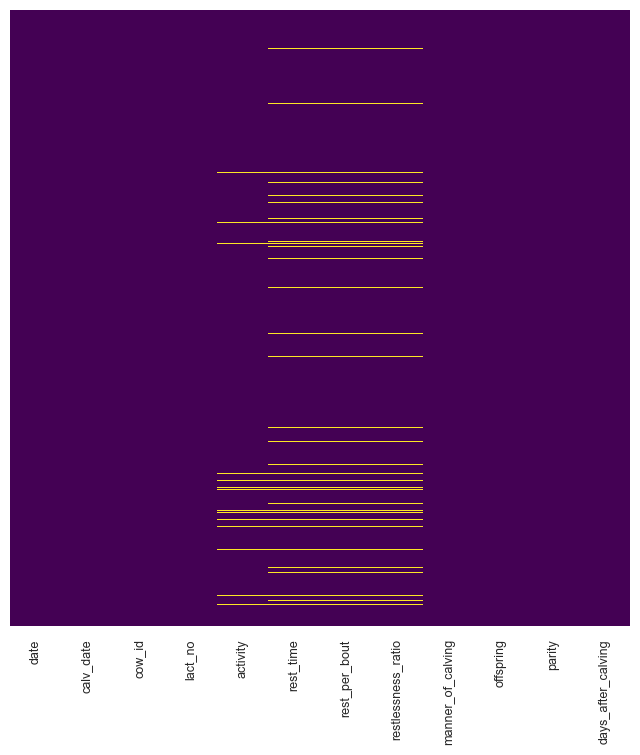

In [10]:
sns.set_style('white')
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.xticks(fontsize=9)
plt.show()

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [14]:
columns_with_missing_values = ['activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio']

In [16]:
impute_mice = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
df[columns_with_missing_values] = impute_mice.fit_transform(df[columns_with_missing_values])

In [17]:
df.to_csv('calving_data_28_days.csv', index=False)

In [22]:
df = pd.read_csv('calving_data_28.csv')

In [23]:
df.head()

,date,calv_date,cow_id,lact_no,activity,rest_time,rest_per_bout,restlessness_ratio,manner_of_calving,offspring,parity,days_after_calving
0,24/12/2021,24/12/2021,3,2,204.0,41.0,19.0,77.0,Normal,1,multiparous,0
1,25/12/2021,24/12/2021,3,2,240.0,453.0,45.0,5.0,Normal,1,multiparous,1
2,26/12/2021,24/12/2021,3,2,304.0,481.0,25.0,5.6,Normal,1,multiparous,2
3,27/12/2021,24/12/2021,3,2,155.0,547.0,26.0,2.9,Normal,1,multiparous,3
4,28/12/2021,24/12/2021,3,2,178.0,528.0,33.0,3.3,Normal,1,multiparous,4


In [25]:
df['activity'] = df['activity'].astype('int64')

In [27]:
df['rest_time'] = df['rest_time'].astype('int64')
df['rest_per_bout'] = df['rest_per_bout'].astype('int64')
df['rest_per_bout'] = df['rest_per_bout'].astype('int64')
df['offspring'] = df['offspring'].astype('int64')
df['days_after_calving'] = df['days_after_calving'].astype('int64')
df['cow_id'] = df['cow_id'].astype('int64')
df['lact_no'] = df['lact_no'].astype('int64')
df['date'] = pd.to_datetime(df['date'])
df['calv_date'] = pd.to_datetime(df['date'])

In [30]:
num_features = [col for col in df.columns if df[col].dtypes!='O']
num_features

['date',
 'calv_date',
 'cow_id',
 'lact_no',
 'activity',
 'rest_time',
 'rest_per_bout',
 'restlessness_ratio',
 'offspring',
 'days_after_calving']

In [31]:
cat_features = [col for col in df.columns if df[col].dtypes=='O']
cat_features

['manner_of_calving', 'parity']

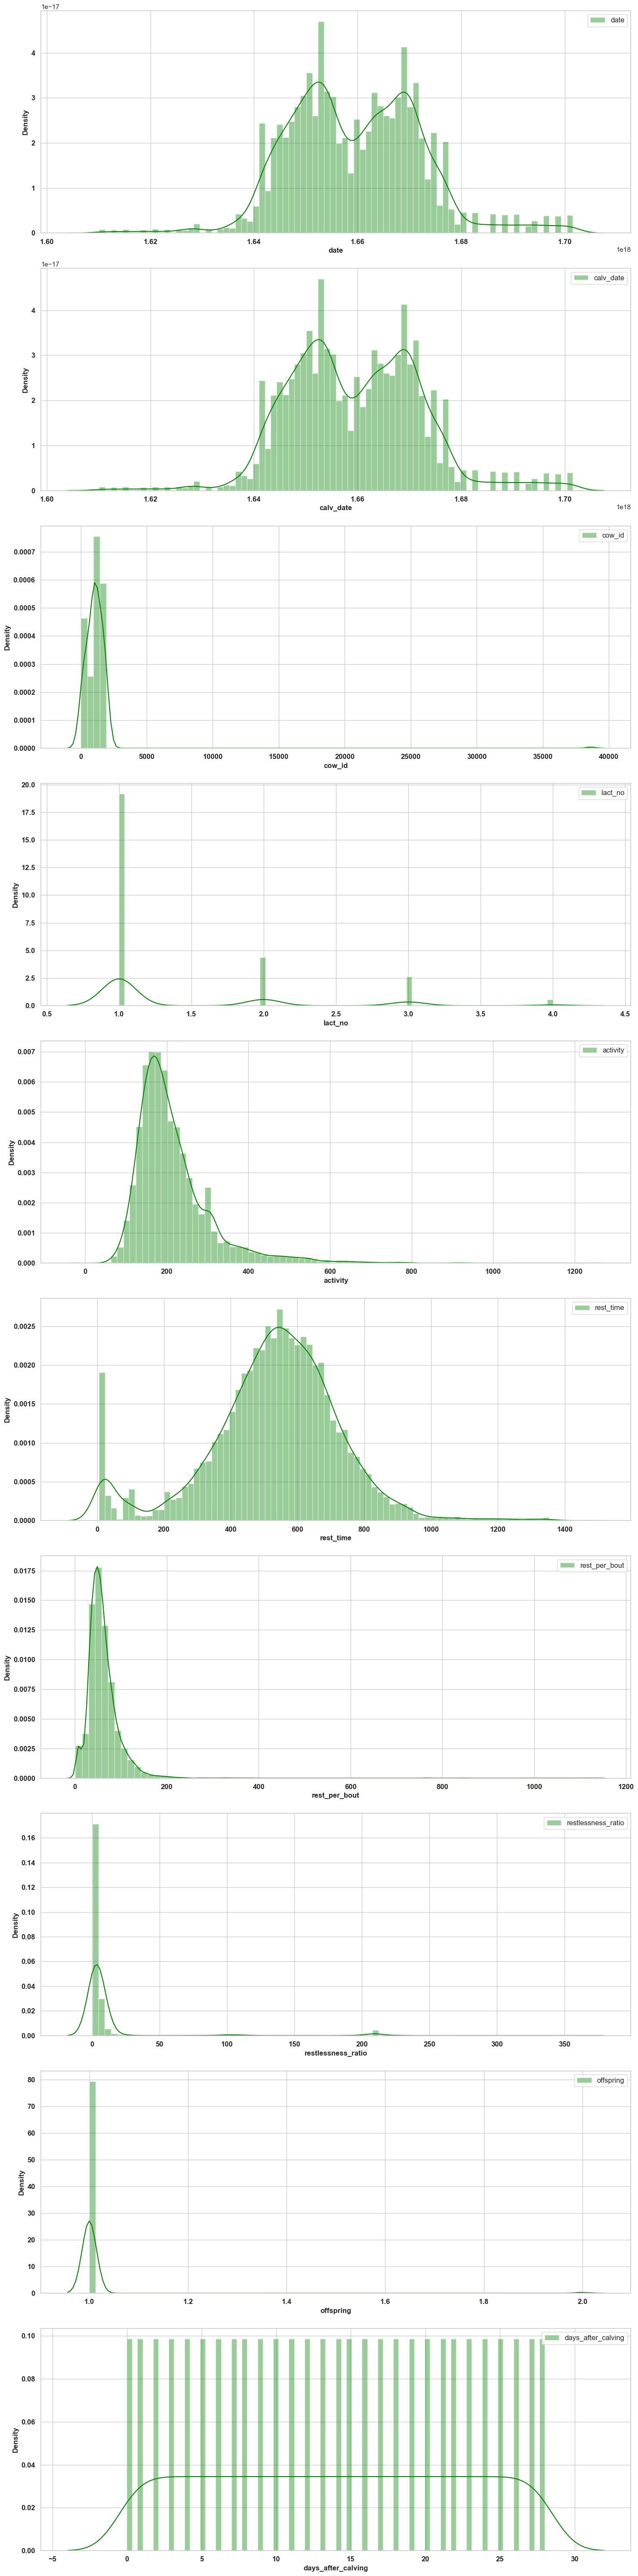

In [33]:
sns.set_style('whitegrid')
i = 1
fig, axe = plt.subplots(3,9, figsize=(15,60))
for feature in num_features:
    plt.subplot(10,1,i)
    sns.distplot(df[feature], color='green', kde=True, bins=80, label=feature)
    plt.xlabel(feature, fontsize=12, fontweight='bold')
    plt.ylabel('Density', fontsize=12, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)
    plt.tight_layout()
    i = i + 1
plt.show()

In [34]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isnull(), replace=True, random_state=0)
    random_sample_index =df[df[feature].isnull()].index
    df.loc[df[df[feature].isnull(), feature]] = random_state

In [35]:
for col in num_features:
    random_value_imputation

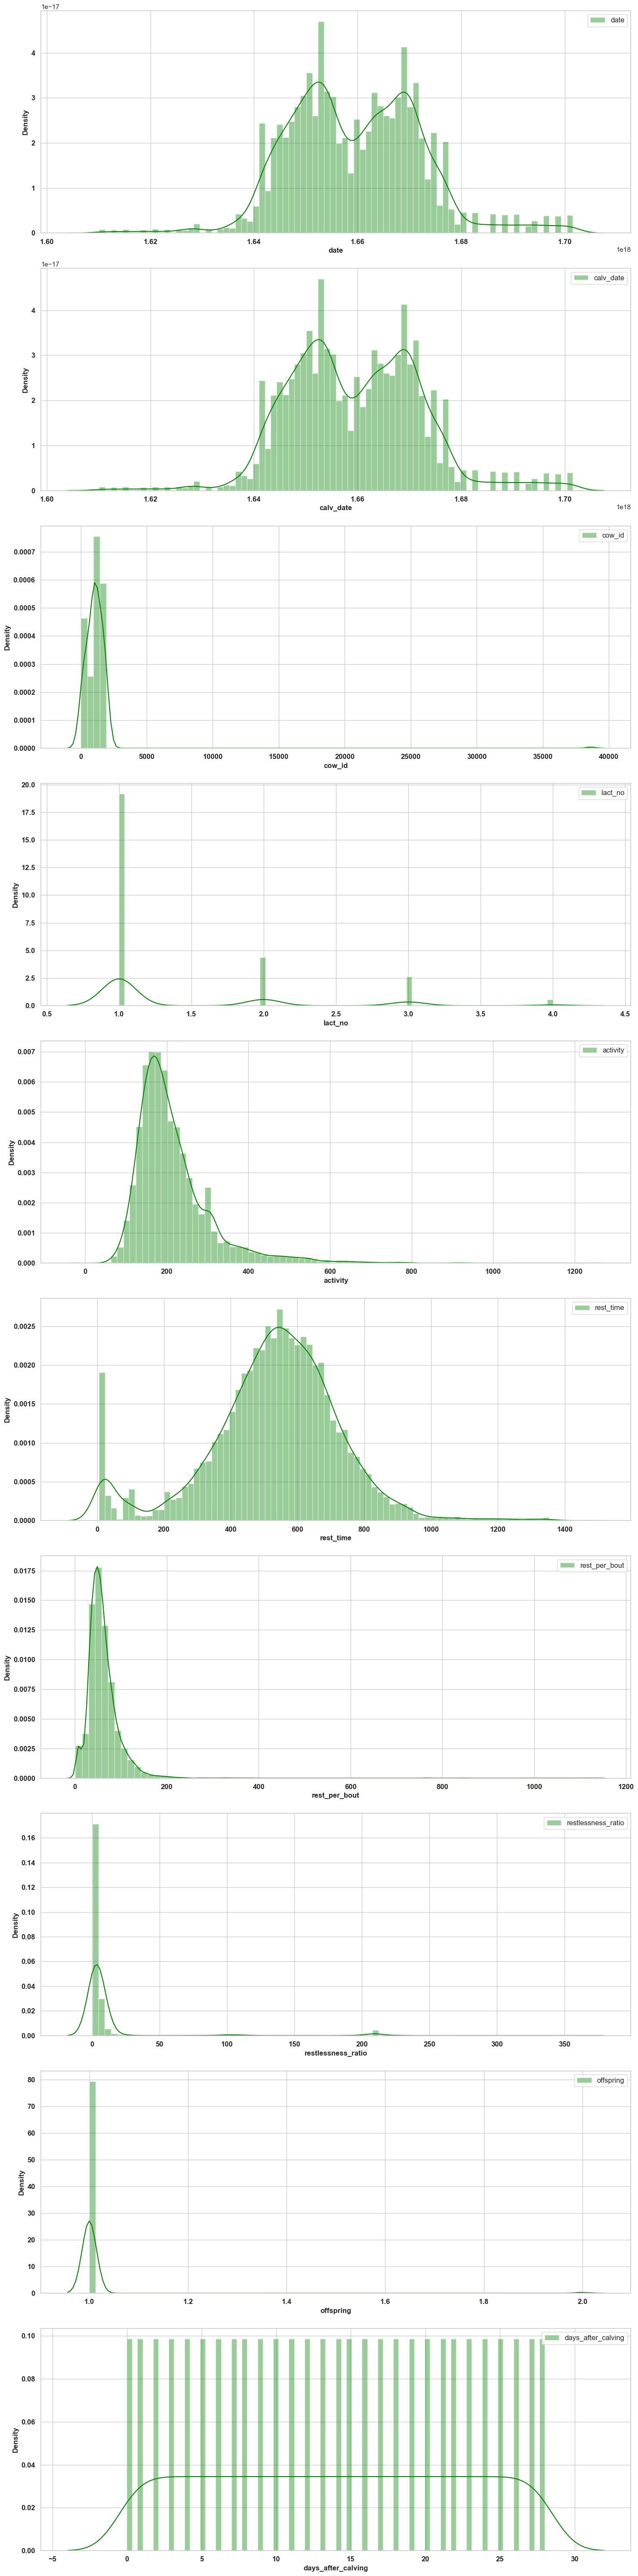

In [36]:
sns.set_style('whitegrid')
i = 1
fig, axe = plt.subplots(3,9, figsize=(15,60))
for feature in num_features: 
    plt.subplot(10,1,i)
    sns.distplot(df[feature], label=feature, kde=True, bins=80, color='green')
    plt.xlabel(feature, fontsize=12, fontweight='bold')
    plt.ylabel('Density', fontsize=12, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)
    plt.tight_layout()
    i = i + 1
plt.show()

In [37]:
df[num_features].isnull().sum()

date                  0
calv_date             0
cow_id                0
lact_no               0
activity              0
rest_time             0
rest_per_bout         0
restlessness_ratio    0
offspring             0
days_after_calving    0
dtype: int64

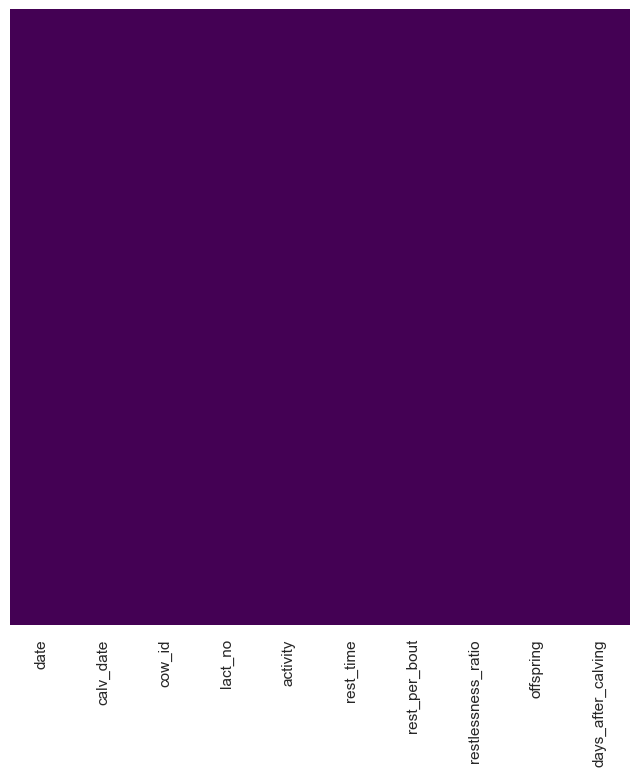

In [38]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(df[num_features].isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

In [39]:
df[num_features]

,date,calv_date,cow_id,lact_no,activity,rest_time,rest_per_bout,restlessness_ratio,offspring,days_after_calving
0,2021-12-24,2021-12-24,3,2,204,41,19,77.0,1,0
1,2021-12-25,2021-12-25,3,2,240,453,45,5.0,1,1
2,2021-12-26,2021-12-26,3,2,304,481,25,5.6,1,2
3,2021-12-27,2021-12-27,3,2,155,547,26,2.9,1,3
4,2021-12-28,2021-12-28,3,2,178,528,33,3.3,1,4
...,...,...,...,...,...,...,...,...,...,...
10087,2022-02-10,2022-02-10,1879,1,153,667,42,2.0,1,24
10088,2022-03-10,2022-03-10,1879,1,119,738,49,1.6,1,25
10089,2022-04-10,2022-04-10,1879,1,124,742,57,1.6,1,26
10090,2022-05-10,2022-05-10,1879,1,182,601,55,2.4,1,27


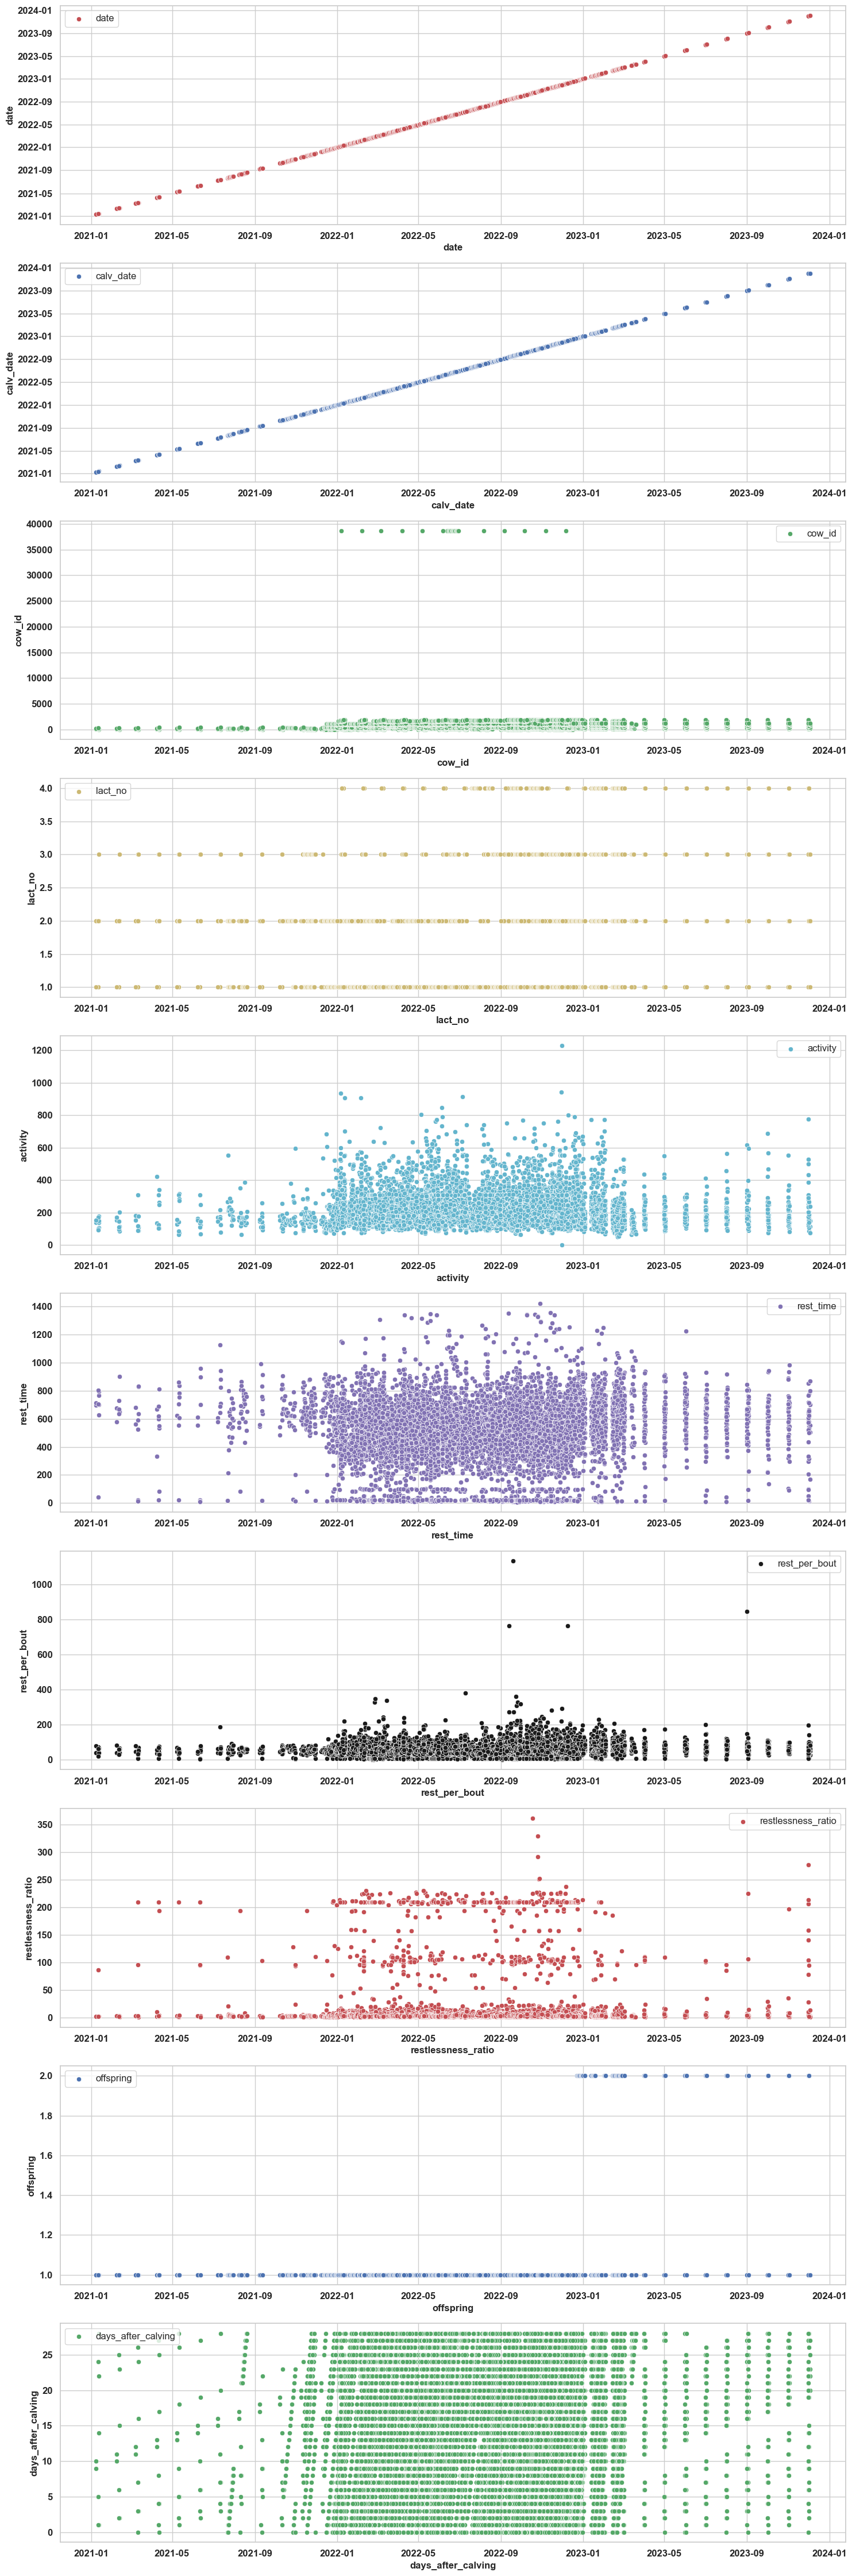

In [41]:
sns.set_style('whitegrid')
colors = itertools.cycle(['r', 'b', 'g', 'y', 'c', 'm', 'k', 'r', 'b', 'g'])
i = 1
fig,axe = plt.subplots(3,9, figsize=(15,45))
for feature in num_features:
    plt.subplot(10,1,i)
    sns.scatterplot(x='date', y=df[feature], data=df, color=next(colors), label=feature)
    plt.xlabel(feature, fontsize=12, fontweight='bold')
    plt.ylabel(feature, fontsize=12, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)
    plt.tight_layout()
    i = i + 1
plt.show()

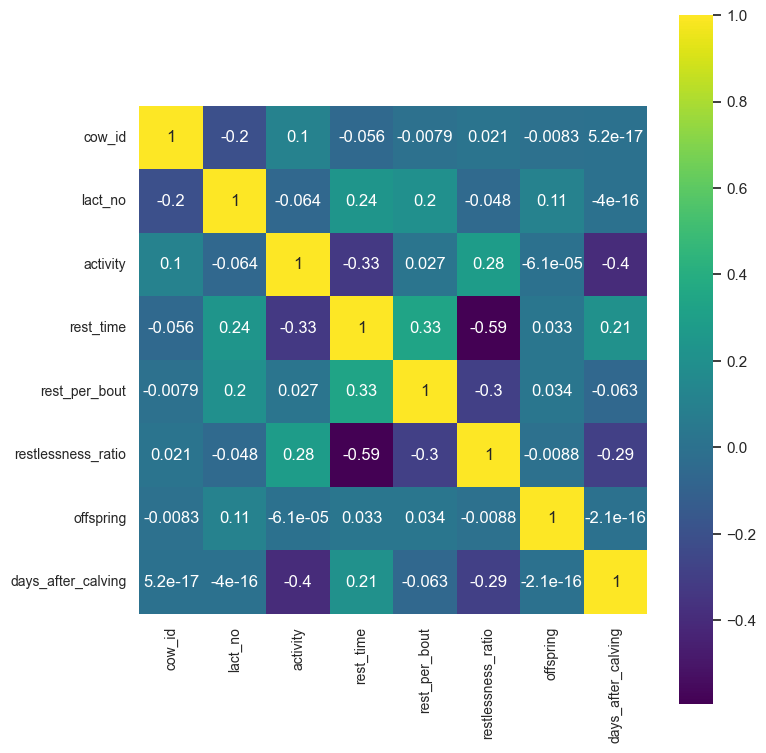

In [42]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, cmap='viridis', square=True, annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()